In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC  # Using Support Vector Classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Set plot style for better aesthetics
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

In [13]:
# Load the dataset
file_path = 'Dataset_Model_Preprocessed.csv'
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
    print("Shape of the dataset:", df.shape)
    print("\nFirst 5 rows of the dataset:")
    print(df.head())
except FileNotFoundError:
    print(f"Error: '{file_path}' not found.")
    # Create a dummy DataFrame for demonstration if file not found
    print("\nCreating a dummy dataset for demonstration purposes...")
    num_samples = 500
    ap_cols = [f'ap_{i}' for i in range(1, 44)]
    dummy_data = {}
    for col in ap_cols:
        dummy_data[col] = np.random.randint(-95, -30, num_samples)
        dummy_data[col][np.random.rand(num_samples) < 0.3] = np.nan  # Introduce some NaNs
    dummy_data['spot'] = np.random.choice(['Lantai 1', 'Lantai 2', 'Lantai 3', 'Lantai 4'], num_samples)
    df = pd.DataFrame(dummy_data)
    print("Dummy dataset created.")
    print(df.head())

Dataset loaded successfully.
Shape of the dataset: (86, 44)

First 5 rows of the dataset:
   ap_1  ap_2  ap_3  ap_4  ap_5  ap_6  ap_7  ap_8  ap_9  ap_10  ...  ap_35  \
0 -37.0 -41.0   NaN   NaN   NaN   NaN -93.0   NaN -74.0    NaN  ...    NaN   
1 -68.0 -69.0   NaN -65.0   NaN -76.0   NaN -72.0 -79.0  -81.0  ...    NaN   
2 -53.0 -56.0   NaN -68.0   NaN -67.0 -82.0 -76.0 -76.0  -76.0  ...    NaN   
3 -69.0 -74.0 -62.0 -59.0 -87.0 -35.0 -49.0 -60.0 -75.0  -59.0  ...    NaN   
4 -63.0 -58.0   NaN -76.0   NaN -77.0   NaN   NaN -65.0  -85.0  ...    NaN   

   ap_36  ap_37  ap_38  ap_39  ap_40  ap_41  ap_42  ap_43      spot  
0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  Lantai 1  
1    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  Lantai 1  
2    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  Lantai 1  
3    NaN    NaN    NaN  -83.0    NaN    NaN    NaN    NaN  Lantai 1  
4    NaN  -80.0    NaN    NaN    NaN    NaN  -72.0    NaN  Lantai 1  

[5 rows x 44 columns

In [14]:
## Pra-pemrosesan Data

# Handle missing values: fill NaN with a placeholder (e.g., -100 for RSSI)
df.fillna(-100, inplace=True)

# Define features (X) and target (y)
X = df.drop('spot', axis=1)
y = df['spot']

# Encode the target variable 'spot' (categorical for classification)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25, random_state=42, stratify=y_encoded)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
## Membangun dan Melatih Model SVM

# Initialize the Support Vector Classifier model
svm_model = SVC(kernel='linear', C=1.0, gamma='scale')  # You can choose different kernels like 'rbf', 'poly', etc.

# Train the model
print("\nTraining Support Vector Machine model...")
svm_model.fit(X_train_scaled, y_train)
print("Support Vector Machine model training complete.")



Training Support Vector Machine model...
Support Vector Machine model training complete.


In [17]:
##Evaluasi Model SVM

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"\n--- Model Evaluation (Support Vector Machine) ---")
print(f"Model Accuracy: {accuracy_svm:.4f}")

# Classification Report
print("\nClassification Report (Support Vector Machine):")
print(classification_report(y_test, y_pred_svm, target_names=le.classes_))


--- Model Evaluation (Support Vector Machine) ---
Model Accuracy: 0.9545

Classification Report (Support Vector Machine):
              precision    recall  f1-score   support

    Lantai 1       0.90      1.00      0.95         9
    Lantai 2       1.00      1.00      1.00         4
    Lantai 3       1.00      1.00      1.00         4
    Lantai 4       1.00      0.80      0.89         5

    accuracy                           0.95        22
   macro avg       0.97      0.95      0.96        22
weighted avg       0.96      0.95      0.95        22



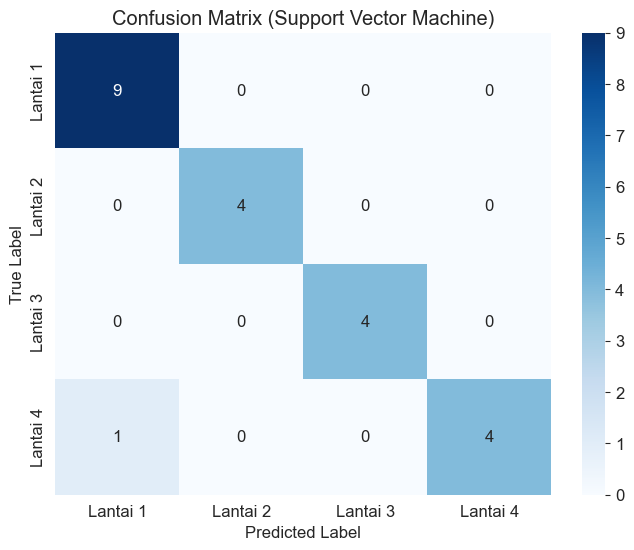

In [18]:
# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix (Support Vector Machine)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

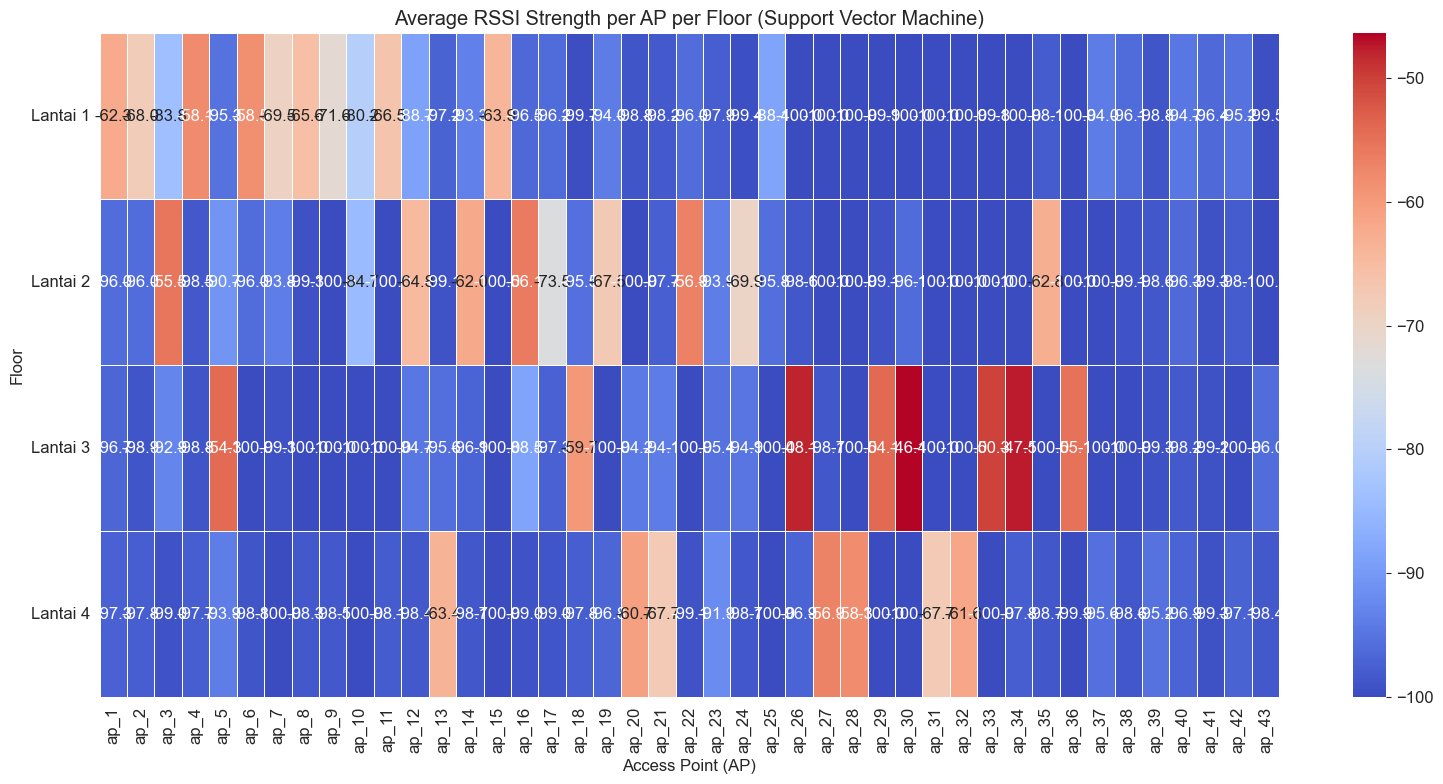

In [19]:
##Visualisasi Rata-rata Kekuatan Sinyal

# Calculate mean RSSI for each AP per floor
avg_rssi_per_floor = df.groupby('spot')[X.columns].mean()

plt.figure(figsize=(16, 8))
sns.heatmap(avg_rssi_per_floor, cmap='coolwarm', annot=True, fmt=".1f", linewidths=.5)
plt.title('Average RSSI Strength per AP per Floor (Support Vector Machine)')
plt.xlabel('Access Point (AP)')
plt.ylabel('Floor')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()